In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Retail_Sales_500.csv")

# Display first few rows
print("First 5 rows:\n", df.head())


First 5 rows:
   Transaction_ID        Date Customer_ID Product     Category  Quantity  \
0          T1000  2024-01-01         C82  Laptop  Electronics         4   
1          T1001  2024-01-02         C15   Shoes      Fashion         5   
2          T1002  2024-01-03          C4  Laptop  Electronics         3   
3          T1003  2024-01-04         C95  Laptop  Electronics         5   
4          T1004  2024-01-05         C36  Mobile  Electronics         5   

   Price Region  Total_Amount  
0  50000   West        200000  
1   1500  North          7500  
2  50000   East        150000  
3  50000   West        250000  
4  15000   West         75000  


In [2]:

# Check missing values
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 Transaction_ID    0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Price             0
Region            0
Total_Amount      0
dtype: int64


In [3]:

# Drop duplicates
df = df.drop_duplicates()

# Summary statistics for required columns
summary = df[['Quantity', 'Total_Amount']].agg(['min', 'max', 'mean'])
print("\nSummary Statistics (Quantity & Total Amount):\n", summary)

# Additional numeric summary (recommended)
summary_all = df[['Quantity', 'Price', 'Total_Amount']].describe()
print("\nAdditional Summary Statistics:\n", summary_all)

# Data types and shape
print("\nData Types:\n", df.dtypes)
print("\nShape of dataset:", df.shape)

# No missing values → no fillna required
print("\nNo missing values found. Data is clean.")


Summary Statistics (Quantity & Total Amount):
       Quantity  Total_Amount
min       1.00         20.00
max       5.00     250000.00
mean      2.97      22838.86

Additional Summary Statistics:
          Quantity         Price   Total_Amount
count  500.000000    500.000000     500.000000
mean     2.970000   7434.480000   22838.860000
std      1.425891  15053.643582   51708.145834
min      1.000000     20.000000      20.000000
25%      2.000000    120.000000     250.000000
50%      3.000000    600.000000    1500.000000
75%      4.000000   1500.000000    7500.000000
max      5.000000  50000.000000  250000.000000

Data Types:
 Transaction_ID    object
Date              object
Customer_ID       object
Product           object
Category          object
Quantity           int64
Price              int64
Region            object
Total_Amount       int64
dtype: object

Shape of dataset: (500, 9)

No missing values found. Data is clean.


In [4]:
# ROLL-UP: Total sales aggregated by Region
rollup_region = df.groupby('Region')['Total_Amount'].sum().reset_index().sort_values('Total_Amount', ascending=False)
print("\nTotal Sales by Region:\n", rollup_region)


Total Sales by Region:
   Region  Total_Amount
3   West       3643470
0   East       2819650
2  South       2660510
1  North       2295800


In [5]:

# SLICE/DICE: Electronics products in North region
slice_data = df[(df['Category'] == 'Electronics') & (df['Region'] == 'North')]
print("\nSales for Electronics in North region:\n", slice_data[['Product', 'Quantity', 'Total_Amount']])
print("\nNumber of transactions:", len(slice_data))


Sales for Electronics in North region:
     Product  Quantity  Total_Amount
8    Mobile         3         45000
11   Laptop         3        150000
13   Mobile         2         30000
36   Laptop         3        150000
100  Mobile         4         60000
149  Mobile         4         60000
153  Mobile         1         15000
174  Laptop         4        200000
185  Mobile         4         60000
191  Mobile         5         75000
216  Laptop         4        200000
224  Mobile         1         15000
276  Mobile         5         75000
292  Mobile         1         15000
304  Laptop         3        150000
338  Mobile         5         75000
342  Laptop         3        150000
354  Mobile         2         30000
384  Laptop         5        250000
396  Mobile         5         75000
402  Mobile         1         15000
475  Laptop         5        250000

Number of transactions: 22


In [6]:
# DRILL-DOWN: Region → Product
drilldown = df.groupby(['Region', 'Product'])['Total_Amount'].sum().reset_index()
drilldown = drilldown.sort_values(['Region', 'Total_Amount'], ascending=[True, False])
print("\nDrill-down (Region → Product):\n", drilldown)


Drill-down (Region → Product):
    Region  Product  Total_Amount
1    East   Laptop       1750000
3    East   Mobile        930000
6    East    Shoes         73500
4    East     Rice         40800
0    East     Book         18600
5    East  Shampoo          4680
2    East     Milk          1250
7    East     Soap           820
9   North   Laptop       1500000
11  North   Mobile        645000
14  North    Shoes         82500
12  North     Rice         40200
8   North     Book         19200
13  North  Shampoo          6000
10  North     Milk          2200
15  North     Soap           700
17  South   Laptop       1750000
19  South   Mobile        780000
22  South    Shoes         81000
20  South     Rice         27600
16  South     Book         15600
21  South  Shampoo          3960
18  South     Milk          1750
23  South     Soap           600
25   West   Laptop       2800000
27   West   Mobile        690000
30   West    Shoes         96000
28   West     Rice         34200
24   West 

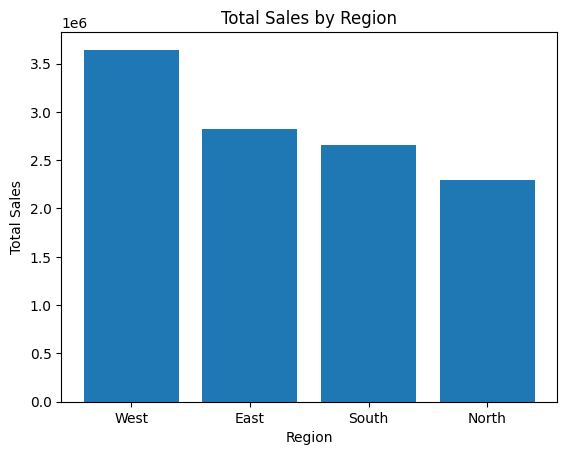

In [7]:
import matplotlib.pyplot as plt

# Roll-up bar chart
plt.bar(rollup_region['Region'], rollup_region['Total_Amount'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate label encoders
le_product = LabelEncoder()
le_region = LabelEncoder()
le_category = LabelEncoder()

# Encode categorical columns
df['Product'] = le_product.fit_transform(df['Product'])
df['Region'] = le_region.fit_transform(df['Region'])
df['Category'] = le_category.fit_transform(df['Category'])

# Define features and target
X = df[['Product', 'Region', 'Quantity']]
y = df['Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree model
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
print("\nFeature Importance:")
for feature, score in zip(X.columns, model.feature_importances_):
    print(feature, ":", score)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        26

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Feature Importance:
Product : 1.0
Region : 0.0
Quantity : 0.0



Cluster Centers (scaled):
 [[-1.07539032 -0.32675945]
 [ 0.34758056  2.91187383]
 [ 0.73642494 -0.23505415]]

Cluster Summary (mean values):
          Quantity   Total_Amount
Cluster                         
0        1.438144    5959.639175
1        3.465116  173255.813953
2        4.019011   10696.806084

Cluster Counts:
 Cluster
2    263
0    194
1     43
Name: count, dtype: int64


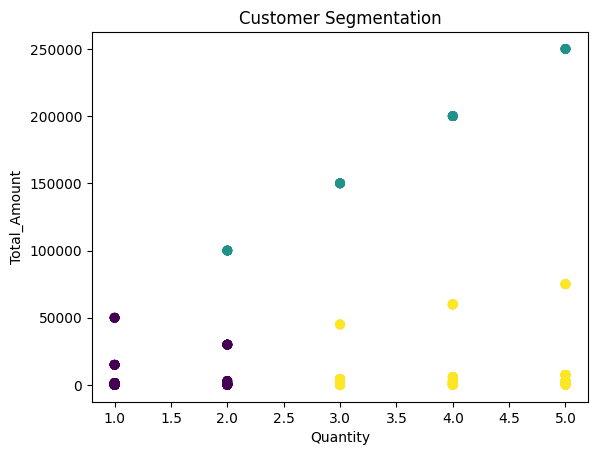

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
X = df[['Quantity', 'Total_Amount']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster centers
print("\nCluster Centers (scaled):\n", kmeans.cluster_centers_)

# Cluster summary (unscaled)
print("\nCluster Summary (mean values):\n",
      df.groupby('Cluster')[['Quantity', 'Total_Amount']].mean())

# Cluster sizes
print("\nCluster Counts:\n", df['Cluster'].value_counts())

plt.scatter(df['Quantity'], df['Total_Amount'], c=df['Cluster'])
plt.xlabel('Quantity')
plt.ylabel('Total_Amount')
plt.title('Customer Segmentation')
plt.show()


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

 Electronics       1.00      1.00      1.00        32
     Fashion       1.00      1.00      1.00        17
     Grocery       1.00      1.00      1.00        75
  Stationery       1.00      1.00      1.00        26

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


Feature Importance:
             Feature  Importance
11            Price         1.0
0    Product_Laptop         0.0
2    Product_Mobile         0.0
1      Product_Milk         0.0
3      Product_Rice         0.0
4   Product_Shampoo         0.0
6      Product_Soap         0.0
5     Product_Shoes         0.0
7      Region_North         0.0
8      Region_South         0.0
9       Region_West         0.0
10         Quantity         0.0


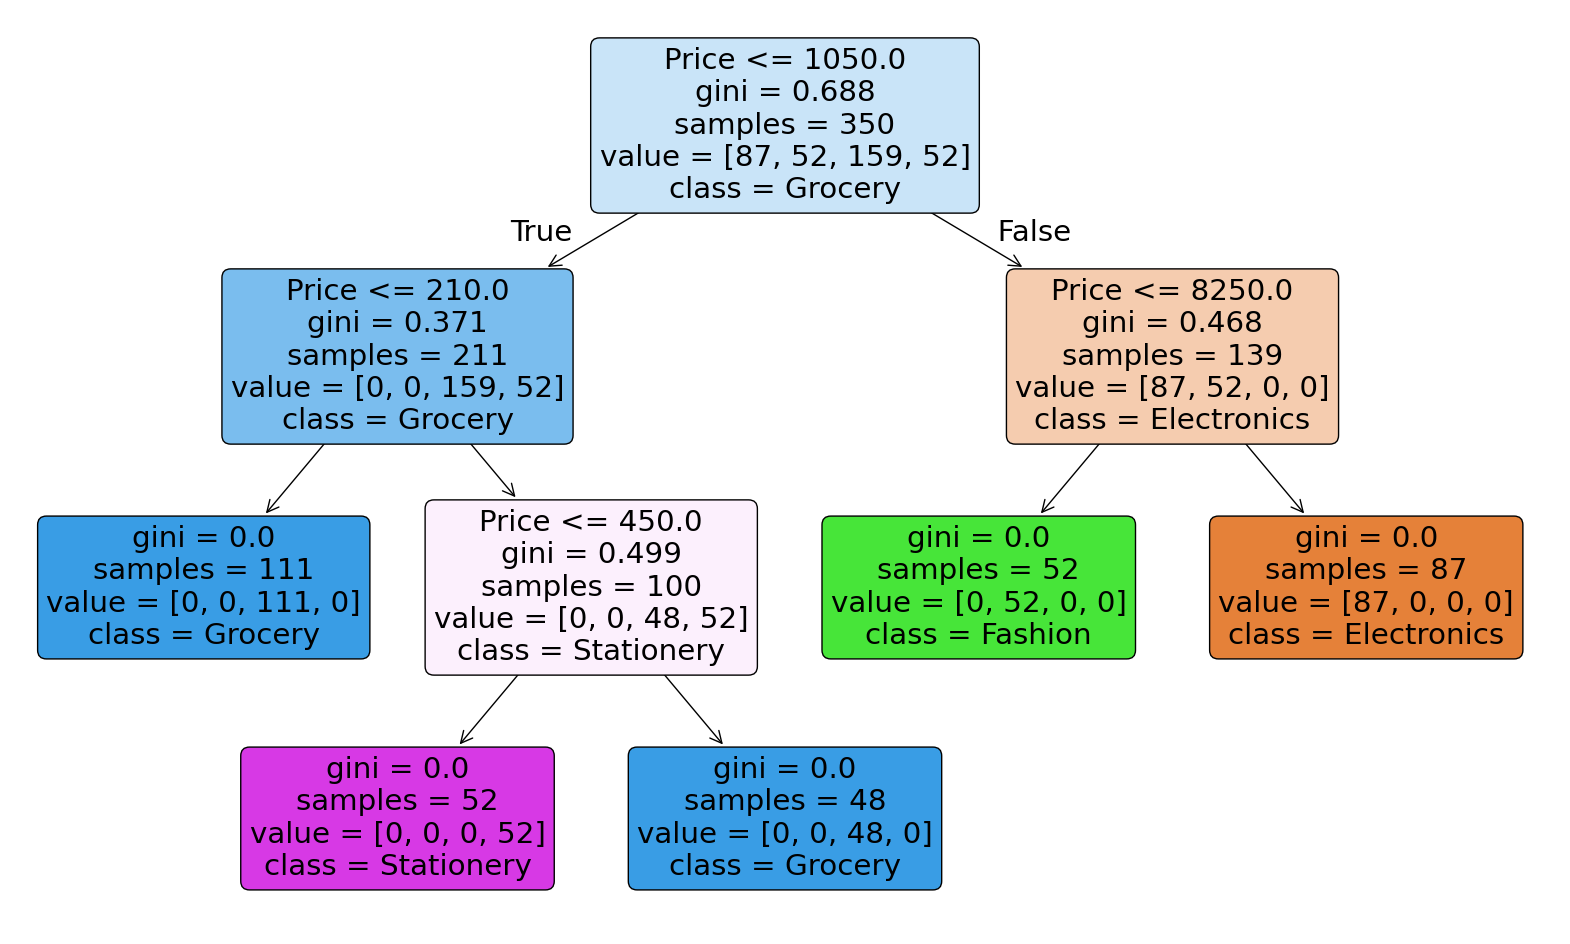

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# ---------------------------------------------------
# LOAD & CLEAN DATA
# ---------------------------------------------------
df = pd.read_csv("Retail_Sales_500.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert Category to string
df['Category'] = df['Category'].astype(str)

# ---------------------------------------------------
# FEATURE SELECTION
# Predicting: Category
# Using: Product, Region, Quantity (numeric), Price(optional)
# ---------------------------------------------------

# One-hot encode Product & Region only
X = pd.get_dummies(df[['Product', 'Region']], drop_first=True)

# Add numeric features
X['Quantity'] = df['Quantity']
X['Price'] = df['Price']  # Optional but useful

# Target variable
y = df['Category']

# ---------------------------------------------------
# TRAIN–TEST SPLIT
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---------------------------------------------------
# TRAIN DECISION TREE
# ---------------------------------------------------
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# ---------------------------------------------------
# EVALUATION
# ---------------------------------------------------
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:\n", importance_df)

# ---------------------------------------------------
# PLOT DECISION TREE
# ---------------------------------------------------
plt.figure(figsize=(20, 12))
plot_tree(model,
          filled=True,
          feature_names=X.columns,
          class_names=model.classes_,
          rounded=True)
plt.show()

In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create basket per customer
basket = (df.groupby(['Customer_ID', 'Product'])['Quantity']
            .sum()
            .unstack()
            .fillna(0))

# Convert to 0/1
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Frequent itemsets
freq_items = apriori(basket, min_support=0.01, use_colnames=True)
print(freq_items)

# Rules
rules = association_rules(freq_items, metric="lift", min_threshold=1.0)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print(rules)

     support                                           itemsets
0       0.57                                             (Book)
1       0.42                                           (Laptop)
2       0.39                                             (Milk)
3       0.51                                           (Mobile)
4       0.49                                             (Rice)
..       ...                                                ...
227     0.01         (Shoes, Shampoo, Rice, Laptop, Milk, Soap)
228     0.01       (Shoes, Shampoo, Rice, Laptop, Mobile, Soap)
229     0.01         (Shoes, Milk, Shampoo, Rice, Mobile, Soap)
230     0.02  (Milk, Shampoo, Rice, Book, Laptop, Mobile, Soap)
231     0.01  (Shoes, Milk, Shampoo, Rice, Laptop, Mobile, S...

[232 rows x 2 columns]
     antecedents                                   consequents  support  \
0      (Shampoo)                                        (Book)     0.23   
1         (Book)                                     (Sham

/tmp/ipykernel_44459/2827325450.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
# Frequent itemsets
freq_items = apriori(basket, min_support=0.005, use_colnames=True)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules:
                         antecedents                    consequents  support  \
0                          (Laptop)                         (Book)     0.23   
1                            (Book)                       (Laptop)     0.23   
2                            (Book)                         (Milk)     0.21   
3                            (Milk)                         (Book)     0.21   
4                            (Book)                       (Mobile)     0.29   
...                             ...                            ...      ...   
1935  (Laptop, Shoes, Rice, Mobile)          (Shampoo, Soap, Milk)     0.01   
1936    (Laptop, Shoes, Soap, Rice)        (Shampoo, Mobile, Milk)     0.01   
1937  (Laptop, Shoes, Soap, Mobile)          (Shampoo, Rice, Milk)     0.01   
1938          (Laptop, Shoes, Milk)  (Shampoo, Soap, Rice, Mobile)     0.01   
1939          (Laptop, Shoes, Rice)  (Shampoo, Soap, Mobile, Milk)     0.01   

      confidence      lift  
0

/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
